# Exploring Rating Deviation <a name='exploring-rating-deviation'></a>
---

## Overview

In this notebook, we'll investigate puzzle rating deviation as it relates to puzzle length, number of plays, puzzle themes, and opening tags..

## Contents

1. [Import the required packages and load the data](#import)
2. [Puzzle Length vs. Rating Deviation](#length)
3. [Number of Plays vs. Rating Deviation](#plays)
4. [Puzzle Themes vs. Rating Deviation](#theme)
5. [Opening vs. Rating Deviation](#opening)


# Import the required packages and load the data <a name='import'></a>
---

## Packages

We'll use the following packages.
- [`pandas`](https://pandas.pydata.org/docs/) for analyzing the data.
- [`rpy2`](https://rpy2.github.io/doc/v3.0.x/html/index.html) for its [`ggplot2`](https://rpy2.github.io/doc/v3.0.x/html/graphics.html#package-ggplot2) visualizations.

In [ ]:
import pandas as pd

!pip install rpy2==3.5.1 #Newer versions of rpy2 were causing issues.

#Activate R magic
%reload_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The cell below uses `%%R` to run some `R` code that installs and loads the `tidyverse` packages needed to create our visualizations with `ggplot2`.

In [ ]:
%%R
install.packages("tidyverse")
library("tidyverse")

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpblVSHv/downloaded_packages’


✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load the data

Now let's load the `lichess_db_puzzles_clean.csv` from our data collection and processing efforts in `puzzle_journey_data_collection_processing.ipynb`.

In [ ]:
puzzles_df = pd.read_csv('lichess_db_puzzle_clean.csv')

puzzles_df.head()

,Puzzle_ID,FEN,Moves,Rating,Rating_Deviation,Popularity,Number_of_Plays,Themes,URL,Opening_Tags,Puzzle_Length
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1925,74,95,3136,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,5
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1518,75,96,19577,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN,3
2,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1172,75,86,538,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,3
3,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1565,81,89,80,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN,5
4,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1520,75,100,169,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN,3


Now, transfer this dataframe to the `R` namespace. Note that `%Rpush` caused the runtime to crash.

In [ ]:
%R puzzles_dfr <- read.csv('lichess_db_puzzle_clean.csv')

,Puzzle_ID,FEN,Moves,Rating,Rating_Deviation,Popularity,Number_of_Plays,Themes,URL,Opening_Tags,Puzzle_Length
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1925,74,95,3136,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,,5
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1518,75,96,19577,advantage endgame short,https://lichess.org/F8M8OS71#53,,3
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1172,75,86,538,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,3
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1565,81,89,80,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,,5
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1520,75,100,169,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,,3
...,...,...,...,...,...,...,...,...,...,...,...
3157076,zzzYp,3r1rk1/3pN1pp/nq3pn1/1pp1p1QN/4P3/5P2/2P3PP/3R...,g8h8 e7g6 h7g6 g5g6,1058,77,89,590,crushing kingsideAttack middlegame short,https://lichess.org/Yc8Fdtc0/black#52,,3
3157077,zzzc4,3r3k/p5pp/8/5R2/1BQ1p3/P3q3/Bb4PP/6K1 w - - 0 28,g1f1 d8d1 b4e1 e3e1,1022,75,89,364,mate mateIn2 middlegame short,https://lichess.org/jRTmvh6y#55,,3
3157078,zzzco,5Q2/pp3R1P/1kpp4/4p3/2P1P3/3PP2P/Pr2q3/2K5 w -...,f7f2 b2c2 c1b1 e2d1,1711,75,88,1076,endgame mate mateIn2 queensideAttack short,https://lichess.org/hZWTYIAT#69,,3
3157079,zzzhI,r3kb1r/ppp2ppp/2n5/3q3b/3P1B2/5N1P/PPP3P1/RN1Q...,c6d4 f1e1 e8d8 b1c3 d4f3 g2f3,2492,88,82,62,advantage long opening,https://lichess.org/N092KH4f/black#20,Kings_Gambit_Accepted Kings_Gambit_Accepted_Ab...,5


# Puzzle Length vs. Rating Deviation<a name='length'></a>

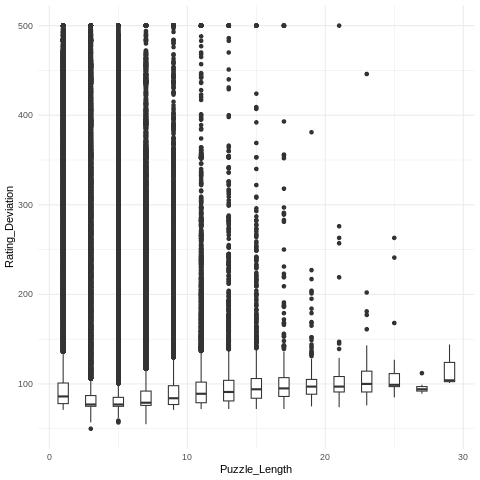

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Puzzle_Length, y = Rating_Deviation))+
  geom_boxplot(aes(group = cut_width(Puzzle_Length, 1)))+
  theme_minimal()

`Puzzle_Length` seems to have little relationship to `Rating_Deviation`—the median `Rating_Deviation` does not vary much with `Puzzle_Length`. Note the large number of potential outliers.

# Number of Plays vs. Rating Deviation<a name='plays'></a>

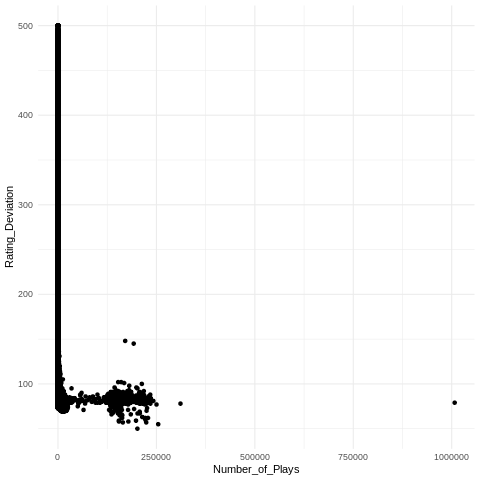

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Number_of_Plays, y = Rating_Deviation))+
  geom_point()+
  theme_minimal()

After puzzles have been played about `1,000` times, the range of `Rating_Deviation` decreases dramatically.

# Puzzle Theme vs. Rating Deviation<a name='theme'></a>

Below, we process the `Themes` data from `puzzles_df` as related to `Rating_Deviation` in a similar manner to what we did with `Themes` and `Rating` in `lichess_db_puzzle_eda_rating.ipynb`. 

Note, below we have not included the `healthyMix` or `playerGames` themes because there are no puzzles in the database with those tags.

In [ ]:
theme_categories = ['advancedPawn', 'advantage', 'anastasiaMate', 'arabianMate', 'attackingF2F7',
                    'attraction', 'backRankMate', 'bishopEndgame', 'bodenMate', 'castling',
                    'capturingDefender', 'crushing', 'doubleBishopMate', 'dovetailMate', 'equality',
                    'kingsideAttack', 'clearance', 'defensiveMove', 'deflection', 'discoveredAttack',
                    'doubleCheck', 'endgame', 'enPassant', 'exposedKing', 'fork',
                    'hangingPiece', 'hookMate', 'interference', 'intermezzo', 'knightEndgame', 
                    'long', 'master', 'masterVsMaster', 'mate', 'mateIn1', 
                    'mateIn2', 'mateIn3', 'mateIn4', 'mateIn5', 'middlegame',
                    'oneMove', 'opening', 'pawnEndgame', 'pin', 'promotion',
                    'queenEndgame', 'queenRookEndgame', 'queensideAttack', 'quietMove', 'rookEndgame',
                    'sacrifice', 'short', 'skewer', 'smotheredMate', 'superGM', 
                    'trappedPiece', 'underPromotion', 'veryLong', 'xRayAttack', 'zugzwang']

In [ ]:
def theme_filter(theme):
  #Set the search condition in `mask` to look for the string `theme` in the `Themes` column.
  mask = puzzles_df['Themes'].str.contains(theme, case = True, na = False, regex = False)
  #Return the dataframe containing only puzzles with the specified `theme` in `Themes` column. 
  #We cast `Opening_Tags` as a `string` to avoid encoding errors when passing to `R`.
  return puzzles_df[mask].astype({'Opening_Tags': 'str'})

In [ ]:
theme_rating_deviation_list = []
for theme in theme_categories:
  theme_rating_deviation_list.append(theme_filter(theme)['Rating_Deviation'].tolist())

In [ ]:
theme_rating_deviation_dictionary = dict(zip(theme_categories, theme_rating_deviation_list))

In [ ]:
theme_rating_deviation_df = pd.DataFrame.from_dict(theme_rating_deviation_dictionary, orient = 'index')
theme_rating_deviation_df = theme_rating_deviation_df.transpose()
theme_rating_deviation_df.head()

,advancedPawn,advantage,anastasiaMate,arabianMate,attackingF2F7,attraction,backRankMate,bishopEndgame,bodenMate,castling,...,sacrifice,short,skewer,smotheredMate,superGM,trappedPiece,underPromotion,veryLong,xRayAttack,zugzwang
0,82.0,75.0,89.0,77.0,74.0,82.0,81.0,76.0,153.0,86.0,...,75.0,75.0,75.0,86.0,75.0,75.0,129.0,167.0,86.0,80.0
1,79.0,75.0,85.0,101.0,91.0,79.0,85.0,79.0,104.0,76.0,...,75.0,75.0,77.0,86.0,75.0,74.0,79.0,78.0,81.0,107.0
2,88.0,77.0,77.0,75.0,94.0,75.0,90.0,87.0,92.0,76.0,...,75.0,75.0,78.0,84.0,79.0,75.0,110.0,79.0,76.0,80.0
3,109.0,75.0,84.0,120.0,76.0,76.0,98.0,75.0,113.0,105.0,...,79.0,77.0,79.0,149.0,79.0,82.0,79.0,87.0,75.0,80.0
4,75.0,114.0,81.0,87.0,89.0,79.0,99.0,76.0,103.0,75.0,...,79.0,75.0,81.0,88.0,76.0,76.0,79.0,72.0,79.0,77.0


In [ ]:
melted_theme_rating_deviation_df = theme_rating_deviation_df.melt(id_vars = None, 
                                                var_name = 'Theme', 
                                                value_name = 'Rating_Deviation')

melted_theme_rating_deviation_df.head()

,Theme,Rating_Deviation
0,advancedPawn,82.0
1,advancedPawn,79.0
2,advancedPawn,88.0
3,advancedPawn,109.0
4,advancedPawn,75.0


We now save the melted data from for use with `R`.

In [ ]:
melted_theme_rating_deviation_df.to_csv('melted_theme_rating_deviation.csv')

After running the script `theme_vs_rating_deviation.R`, we have the following output.

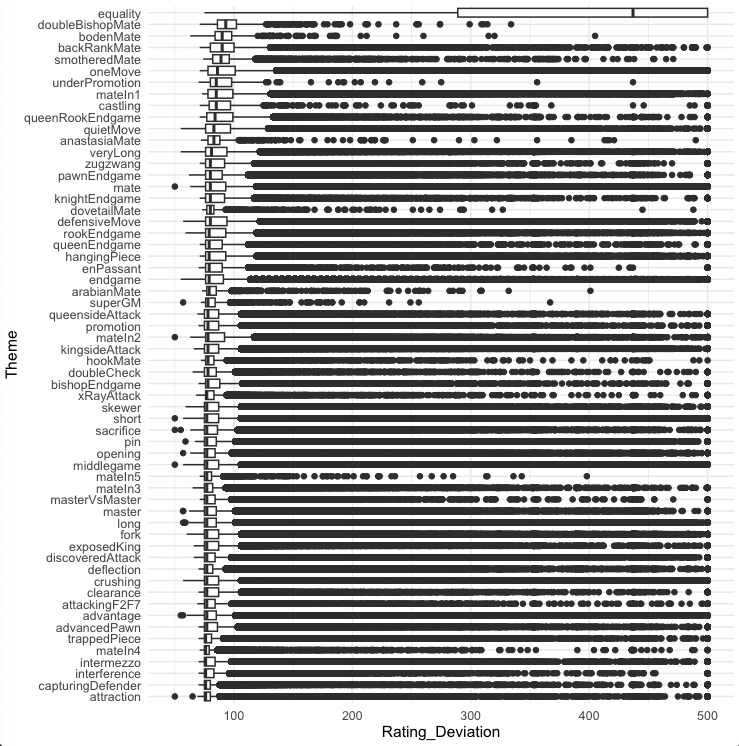

`Rating_Deviation` does not appear to have much relationship with `Theme` overall. There are a lot of potential outliers. 

Notice, the theme `equality` seems to have a much higher median rating deviation than the other themes—this theme may involve subtle, tricky, or otherwise non-standard moves that result in a less-predictable level of difficulty.

# Opening vs. Rating Deviation<a name='opening'></a>

Below, we process the `Opening_Tags` data from `puzzles_df` with respect to `Rating_Deviation` in a similar manner to what we did with `Opening_Tags` and `Rating` in `lichess_db_puzzle_eda_rating.ipynb`.

In [ ]:
opening_puzzles_df = puzzles_df.dropna()

opening_rating_deviation_df = opening_puzzles_df[['Rating_Deviation','Opening_Tags']]

opening_rating_deviation_df['Opening_Tags'] = opening_rating_deviation_df['Opening_Tags'].map(lambda x: x.split()[0])

opening_rating_deviation_df.head()

<ipython-input-6-bbd29f1d9d13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opening_rating_deviation_df['Opening_Tags'] = opening_rating_deviation_df['Opening_Tags'].map(lambda x: x.split()[0])


,Rating_Deviation,Opening_Tags
2,75,Kings_Pawn_Game
5,77,Benoni_Defense
6,75,Horwitz_Defense
10,75,Scotch_Game
14,153,Sicilian_Defense


In [ ]:
%Rpush opening_rating_deviation_df

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


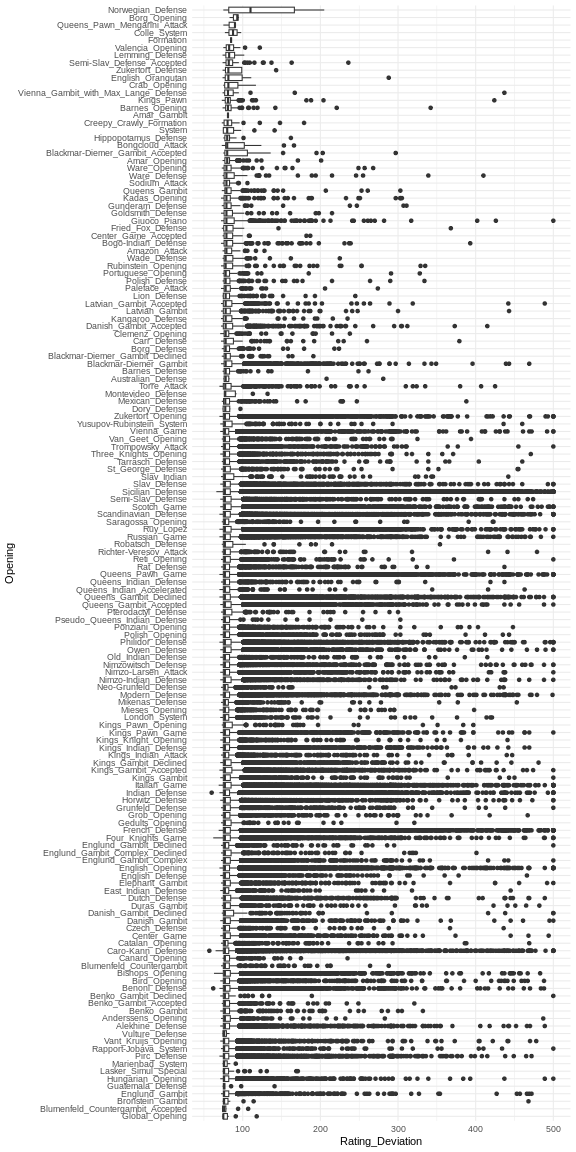

In [ ]:
%%R -h 16 -w 8 -u in
ggplot(opening_rating_deviation_df, 
       aes(y = reorder(Opening_Tags, Rating_Deviation, FUN = median, na.rm = TRUE), x = Rating_Deviation))+
  labs(y = "Opening")+
  geom_boxplot()+
  theme_minimal()

`Opening` does not appear to have much relationship to median`Rating_Deviation` overall—observe the large number of potential outliers. The `Norwegian_Defense` appears to have the highest median rating deviation. This opening may result in puzzles with a less-predictable level of difficulty.